### Analyse von *kleine Anfragen*


In dieser Analyse werden alle Titel von kleinen Anfragen, die zwischen 2011 und Jan. 2019 an die Berliner Regierung und Verwaltung gestellt wurden analysiert. Dabei wir vor allem die Worthäufigkeit und das gemeinsame auftreten von Worten angeschaut. Zusätzlich werden die Häufigkeiten nach antwortender Senatsverwaltung und nach Anfragestellender Partei analysiert.
<br>

### *Analysis of *parliamentary questions**
*This is an analysis of all titles of parliamentary questions between 2011 and Jan. 2019 answered by the Berlin govermnent and administration.
The titles will be anaysed in respect to word counts, co-occurences of words in titles, the amount of questions to the answering department and the amount of questions asked by party.*

In [163]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
import matplotlib.pyplot as plt
%matplotlib inline  
from datetime import datetime
import json

In [164]:
df = pd.read_csv('../data/raw.csv')

In [166]:
df.head(3)

,id,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org
0,1086,Abschaffung der Indologie und Kunstgeschichte ...,Drucksache 17 / 14 217 \n Schriftliche Anfrag...,False,2014-07-17,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...",SenBildJugWiss,CDU
1,1087,Ausgrenzung von Schulen in freier Trägerschaft...,Drucksache 17 / 14 163 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...",SenBildJugWiss,CDU
2,1090,Kinderschutz online - Was ist VERA-net?,Drucksache 17 / 14 150 \n Schriftliche Anfrag...,False,2014-07-11,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...",SenBildJugWiss,Piraten


### Datenaufbereitung
### *Data Cleaning*

In [167]:
# make string date a datetime date
df['published_datetime'] = df.published_at.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [168]:
# clean ministery names

df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Integration, Arbeit und Soziales' in x), 'ministries'] = 'Senatsverwaltung für Integration, Arbeit und Soziales'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Stadtentwicklung und Wohnen' in x), 'ministries'] = 'Senatsverwaltung für Stadtentwicklung und Wohnen'
df.loc[df.ministries.apply(lambda x: 'SenUVK' in x), 'ministries'] = 'Senatsverwaltung für Umwelt, Verkehr und Klimaschutz'
df.loc[df.ministries.apply(lambda x: 'SenUmVerKli' in x), 'ministries'] = 'Senatsverwaltung für Umwelt, Verkehr und Klimaschutz'
df.loc[df.ministries.apply(lambda x: 'SenGesPfleGleich' in x), 'ministries'] = 'Senatsverwaltung für Gesundheit, Pflege und Gleichstellung'
df.loc[df.ministries.apply(lambda x: 'SenStadtWohn' in x), 'ministries'] = 'Senatsverwaltung für Stadtentwicklung und Wohnen'
df.loc[df.ministries.apply(lambda x: 'SenInnDS' in x), 'ministries'] = 'Senatsverwaltung für Inneres und Sport'
df.loc[df.ministries.apply(lambda x: 'SenKultEu' in x), 'ministries'] = 'Senatsverwaltung Kultur und Europa'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Stadtentwicklung und Umwelt' in x), 'ministries'] = 'Senatsverwaltung für Stadtentwicklung und Umwelt (WP17)'
df.loc[df.ministries.apply(lambda x: 'SenBildJugFam' in x), 'ministries'] = 'Senatsverwaltung für Bildung, Jugend und Familie'
df.loc[df.ministries.apply(lambda x: 'SenIAS' in x), 'ministries'] = 'Senatsverwaltung für Integration, Arbeit und Soziales'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Arbeit, Integration und Frauen ' in x), 'ministries'] = 'Senatsverwaltung für Integration, Arbeit und Frauen (WP17)'
df.loc[df.ministries.apply(lambda x: 'SenJustVA' in x), 'ministries'] = 'Senatsverwaltung für Justiz, Verbraucherschutz und Antidiskriminierung'
df.loc[df.ministries.apply(lambda x: 'SenGPG' in x), 'ministries'] = 'Senatsverwaltung für Gesundheit, Pflege und Gleichstellung'
df.loc[df.ministries.apply(lambda x: 'SenWiEnBe' in x), 'ministries'] = 'Senatsverwaltung für Wirtschaft, Energie und Betriebe'
df.loc[df.ministries.apply(lambda x: 'WissForsch' in x), 'ministries'] = 'Wissenschaft und Forschung (Regierender Bürgermeister)'
df.loc[df.ministries.apply(lambda x: 'SenIntArbSoz' in x), 'ministries'] = 'Senatsverwaltung für Integration, Arbeit und Soziales'
df.loc[df.ministries.apply(lambda x: 'SenJustVerAnti' in x), 'ministries'] = 'Senatsverwaltung für Justiz, Verbraucherschutz und Antidiskriminierung'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Justiz und Verbraucherschutz' in x), 'ministries'] = 'Senatsverwaltung für Justiz, Verbraucherschutz und Antidiskriminierung'
df.loc[df.ministries.apply(lambda x: 'SenBildWiss' in x), 'ministries'] = 'Senatsverwaltung für Bildung, Jugend und Wissenschaft (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Bildung, Jugend und Forschung' in x), 'ministries'] = 'Senatsverwaltung für Bildung, Jugend und Wissenschaft (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Bildung, Wisenschaft und Forschung' in x), 'ministries'] = 'Senatsverwaltung für Bildung, Jugend und Wissenschaft (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Bildung, Jugend und Wissenschaft' in x), 'ministries'] = 'Senatsverwaltung für Bildung, Jugend und Wissenschaft (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Gesundheit und Soziales' in x), 'ministries'] = 'Senatsverwaltung für Gesundheit und Soziales (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Wirtschaft, Technolgie und Forschung' in x), 'ministries'] = 'Senatsverwaltung für Wirtschaft, Technolgie und Forschung (WP17)'
df.loc[df.ministries.apply(lambda x: 'Senatsverwaltung für Arbeit, Integration und Frauen' in x), 'ministries'] = 'Senatsverwaltung für Arbeit, Integration und Frauen (WP17)'


df.loc[(df.published_datetime > datetime(2016,12,8)) & (df.ministries == 'Senatsverwaltung für Stadtentwicklung und Umwelt (WP17)'), 'ministries']= 'Senatsverwaltung für Stadtentwicklung und Wohnen'

In [169]:
df.ministries_short = df.ministries.apply(lambda x: x.replace('Senatsverwaltung für', 'Sen.'))

In [170]:
# correct item with wrong year '1978'
df.loc[df.published_datetime.apply(lambda x: x.year) == 1978]

,id,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime
14609,90216,Entwicklung der Schul- und Kitaplätze im wachs...,Drucksache 18 / 15 572\nSchriftliche Anfrage\n...,True,1978-01-19,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",CDU,1978-01-19


In [171]:
df.loc[df.published_datetime.apply(lambda x: x.year) == 1978, 'published_datetime'] = datetime(2018,7,19)

## Explorative Analyse

## *First exploration*

### Anzahl Anfragen nach Senatsverwaltungen
### *Count of questions per minstry*

Wahlperiode 17:

In [172]:
sonstige_threshold = 200
ministries_17=df[df.legislative_term == 17].ministries_short.value_counts()

# create field "sonstige"
ministries_17['Sonstige'] =ministries_17[ministries_17 < sonstige_threshold].sum()
# drop all ministries now included in "Sonstige"
ministries_17.drop(ministries_17[ministries_17 < sonstige_threshold].index, axis=0, inplace=True)

# style table for javascript
ministries_17 = pd.DataFrame(ministries_17.sort_values(ascending=False)).reset_index()
ministries_17.columns = ['ministry','absolute']
ministries_17['percentage'] = ministries_17["absolute"]\
    .apply(lambda x: str(round(x / ministries_17["absolute"].sum() * 100, 1)) + "%")

In [173]:
ministries_17

,ministry,absolute,percentage
0,Sen. Stadtentwicklung und Umwelt (WP17),2282,24.5%
1,Sen. Inneres und Sport,1983,21.2%
2,"Sen. Bildung, Jugend und Wissenschaft (WP17)",1653,17.7%
3,Sen. Gesundheit und Soziales (WP17),905,9.7%
4,Sen. Finanzen,537,5.8%
5,"Sen. Justiz, Verbraucherschutz und Antidiskrim...",511,5.5%
6,Regierender Bürgermeister,487,5.2%
7,"Sen. Arbeit, Integration und Frauen (WP17)",405,4.3%
8,"Sen. Wirtschaft, Technolgie und Forschung (WP17)",360,3.9%
9,Sonstige,209,2.2%


In [174]:
ministries_17.to_csv('../data/ministries_17.csv')

Wahlperiode 18:

In [175]:
sonstige_threshold = 200
ministries_18=df[df.legislative_term == 18].ministries_short.value_counts()
#ministries_18.drop('Skzl (Flughafenkoordinator)', axis=0, inplace=True)
ministries_18['Sonstige'] =ministries_18[ministries_18 < sonstige_threshold].sum()
ministries_18.drop(ministries_18[ministries_18 < sonstige_threshold].index, axis=0, inplace=True)
ministries_18 = pd.DataFrame(ministries_18.sort_values(ascending=False)).reset_index()
ministries_18.columns = ['ministry','absolute']
ministries_18['percentage'] = ministries_18["absolute"]\
    .apply(lambda x: str(round(x / ministries_18["absolute"].sum() * 100, 1)) + "%")

In [176]:
ministries_18

,ministry,absolute,percentage
0,Sen. Inneres und Sport,1545,21.9%
1,"Sen. Umwelt, Verkehr und Klimaschutz",1285,18.2%
2,"Sen. Bildung, Jugend und Familie",1165,16.5%
3,Sonstige,658,9.3%
4,Sen. Stadtentwicklung und Wohnen,610,8.7%
5,"Sen. Integration, Arbeit und Soziales",477,6.8%
6,Sen. Finanzen,412,5.8%
7,"Sen. Justiz, Verbraucherschutz und Antidiskrim...",391,5.5%
8,"Sen. Gesundheit, Pflege und Gleichstellung",254,3.6%
9,Regierender Bürgermeister,249,3.5%


In [177]:
ministries_18.to_csv('../data/ministries_18.csv')

_Departments concerning "environment", "interior" & "sports", "education & youth", "city development" and "social" receive most requests._
<br>
Besonders die Senatsverwaltungen zu den Themen Umwelt, Inneres & Sport, Bildung & Jugend, Stadtentwicklung und Soziales werden häufig angefragt.

### Anzahl Anfragen nach Partei
### *Count of questions by party:*

Wahlperiode 17:

In [178]:
party_17 = df[df.legislative_term == 17].org.value_counts()
party_17

Bündnis 90/Die Grünen    2400
Piraten                  2369
Die Linke                1845
CDU                      1441
SPD                      1129
GRÜEN                      96
FDP/DVP                    25
BVB/FW                     14
fraktionslos               13
Name: org, dtype: int64

Wahlperiode 18:

In [179]:
party_18 = df[df.legislative_term == 18].org.value_counts()
party_18

CDU                      1730
FDP                      1342
SPD                      1105
AfD                      1010
Die Linke                 922
Bündnis 90/Die Grünen     892
fraktionslos               30
FDP/DVP                    15
Name: org, dtype: int64

_AfD and FDP were not part of the Parliament in the legislative period 17. Therefore, there were no 'Anfragen'. The CDU made more 'Anfragen' in the legislative period 18 (as they are not in the government anymore) while 'Die Linke' and 'Die Grünen' made more 'Anfragen' in period 17, as they were not yet part of the government._
<br><br>
AfD und FDP waren in der Wahlperiode 17 nicht im Abgeordnetenhaus vertreten, entsprechend gab es keine Anfragen. Sonst sind ie Anfragen vergleichsweise gleichmäßig verteilt. Die CDU stellt in WP18 mehr Anfragen (nicht mehr in aktueller Regierung) während die Linke und die Grünen in WP17 mehr Anfrage stellten, als sie nicht Teil der Regierung stellten.

#### Anzahl Anfragen nach Partei und führender Partei einer Senatsverwaltung
#### Count of queries for each ministry by party

Wahlperiode 17

In [180]:
ministry_party = pd.DataFrame(data={'Regierender Bürgermeister': ['SPD'],
'Sen. Bildung, Jugend und Wissenschaft (WP17)': ['SPD'],
'Sen. Gesundheit und Soziales': ['SPD'],
'Sen. Inneres und Sport': ['CDU'],
'Sen. Arbeit, Integration und Frauen (WP17)': ['SPD'],
'Sen. Justiz, Verbraucherschutz und Antidiskriminierung': ['CDU'],
'Sen. Stadtentwicklung und Umwelt (WP17)': ['SPD'],
'Sen. Wirtschaft, Technolgie und Forschung (WP17)': ['CDU']
                  }).T

In [181]:
ministry_party.index.name = "ministries_short"

In [182]:
ministry_by_party_counts = df[df.legislative_term == 17].groupby([df.ministries_short, df.org]).count().iloc[:,0].unstack()

In [183]:
ministry_by_party_counts = ministry_by_party_counts.drop('FDP/DVP', axis=1)

In [184]:
colors = {'AfD': 'blue', 'SPD': 'red', 'CDU': 'black', 'Piraten': 'orange', 'Die Linke': 'purple', 'FDP':'yellow', 'Bündnis 90/Die Grünen':'green', 'BVB/FW': 'grey', 'fraktionslos':'grey', 'GRÜEN':'green'}

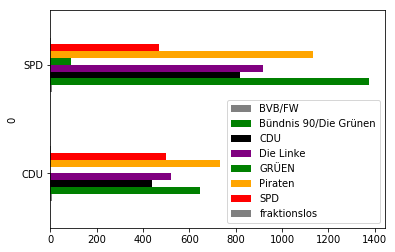

In [185]:
ministry_by_party_counts.merge(ministry_party, on = "ministries_short").groupby([0]).sum().plot(color=[colors[i] for i in ministry_by_party_counts.columns], kind='barh')

Wahlperiode 18

In [186]:
ministry_party = pd.DataFrame(data={'Regierender Bürgermeister': ['SPD'],
'Sen. Bildung, Jugend und Familie': ['SPD'],
'Sen. Finanzen': ['SPD'],
'Sen. Gesundheit, Pflege und Gleichstellung': ['SPD'],
'Sen. Inneres und Sport': ['SPD'],
'Sen. Integration, Arbeit und Soziales': ['Die Linke'],
'Sen. Justiz, Verbraucherschutz und Antidiskriminierung': ['Bündnis 90 / Die Grünen'],
'Sen. Stadtentwicklung und Wohnen': ['Die Linke'],
'Sen. Wirtschaft, Energie und Betriebe': ['Bündnis 90 / Die Grünen'],
'Senatsverwaltung Kultur und Europa': ['Die Linke'],
'Wissenschaft und Forschung (Regierender Bürgermeister)': ['SPD']
                  }).T

In [187]:
ministry_party.index.name = "ministries_short"

In [188]:
ministry_by_party_counts = df[df.legislative_term == 18].groupby([df.ministries_short, df.org]).count().iloc[:,0].unstack()

In [189]:
ministry_by_party_counts = ministry_by_party_counts.drop('FDP/DVP', axis=1)

In [190]:
colors = {'AfD': 'blue', 'SPD': 'red', 'CDU': 'black', 'Piraten': 'orange', 'Die Linke': 'purple', 'FDP':'yellow', 'Bündnis 90/Die Grünen':'green', 'BVB/FW': 'grey', 'fraktionslos':'grey', 'GRÜEN':'green'}

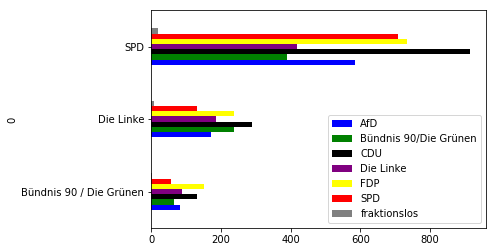

In [191]:
ministry_by_party_counts.merge(ministry_party, on = "ministries_short").groupby([0]).sum().plot(color=[colors[i] for i in ministry_by_party_counts.columns], kind='barh')

How many inqueries were posted by which party segregated into SPD, Linke and Grüne senate deapartments in the election term 18?



### Anfragen nach Ausschüssen

### _Inquiries grouped by comitees_

Anzahl Anfragen, die von Mitgliedern in bestimmten Ausschüssen gestellt wurden.

Amount of inquieries that were made by members of certain comitees.

In [192]:
def check_mda(x):
    for member in members:
        if member in x:
            return True
    return False

In [193]:
# all members that are part of the BJF Ausschuss

members = ['Hildegard Bentele'
'Jessica Bießmann',
'Franziska Brychcy',
'Dennis Buchner',
'Marianne Burkert-Eulitz',
'Mario Czaja',
'Ina Czyborra',
'Emine Demirbürken-Wegner',
'Paul Fresdorf',
'Bettina Jarasch',
'Stefan Franz Kerker',
'Regina Kittler',
'Melanie Kühnemann',
'Joschka Langenbrinck',
'Maja Lasić',
'Gunnar Lindemann',
'Stefanie Remlinger',
'Katrin Seidel',
'Roman Simon',
'Florian Swyter',
'June Tomiak']

In [194]:
# all queries that were posted from members of the bjf Ausschuss and in the term 18
bjf = df[(df.legislative_term == 18) & (df.contents.apply(lambda x: check_mda(x)))]

In [195]:
bjf.count()

id                    1089
title                 1089
contents              1089
contains_table        1089
published_at          1089
url                   1089
legislative_term      1089
ministries            1089
ministries_short      1089
org                   1089
published_datetime    1089
dtype: int64

In [196]:
bjf.ministries_short.value_counts()

Sen. Bildung, Jugend und Familie                          604
Sen. Inneres und Sport                                    148
Sen. Umwelt, Verkehr und Klimaschutz                      130
Sen. Stadtentwicklung und Wohnen                           60
Sen. Integration, Arbeit und Soziales                      33
Sen. Finanzen                                              19
Sen. Justiz, Verbraucherschutz und Antidiskriminierung     18
Sen. Wirtschaft, Energie und Betriebe                      16
Sen. Bildung, Jugend und Wissenschaft (WP17)               14
Sen. Gesundheit, Pflege und Gleichstellung                 11
Regierender Bürgermeister                                  10
Senatsverwaltung Kultur und Europa                          8
Wissenschaft und Forschung (Regierender Bürgermeister)      6
Sen. Gesundheit und Soziales (WP17)                         4
Senatskanzlei                                               4
Sen. Stadtentwicklung und Umwelt (WP17)                     3
Sen. Arb

Von Mitgliedern des Ausschuss Bildung, Jugend und Familie wurden 1089 Anfragen gestellt.

1089 inquiries were made by members of the commitee education, youth and family.

In [197]:
# members of the comittee science and research (Wissenschaft und Forschung)

members = ['Hildegard Bentele',
'Franziska Brychcy',
'Christian Buchholz',
'Dennis Buchner',
'Ina Czyborra',
'Stefan Förster',
'Adrian Grasse',
'Hans-Christian Hausmann',
'Florian Kluckert',
'Maja Lasić',
'Nicole Ludwig',
'Catherina Pieroth-Manelli',
'Robert Schaddach',
'Anja Schillhaneck',
'Sebastian Schlüsselburg',
'Tobias Schulze',
'Martin Trefzer']

In [198]:
wf = df[(df.legislative_term == 18) & (df.contents.apply(lambda x: check_mda(x)))]
wf.count()

id                    791
title                 791
contents              791
contains_table        790
published_at          791
url                   791
legislative_term      791
ministries            791
ministries_short      791
org                   791
published_datetime    791
dtype: int64

Von Mitgliedern des Ausschuss Bildung, Jugend und Familie wurden 791 Anfragen gestellt.

791 inquiries were made by members of the commitee education, youth and family.

In [199]:
wf.ministries_short.value_counts()

Sen. Umwelt, Verkehr und Klimaschutz                      134
Regierender Bürgermeister                                 107
Wissenschaft und Forschung (Regierender Bürgermeister)     95
Sen. Bildung, Jugend und Familie                           88
Sen. Inneres und Sport                                     86
Sen. Stadtentwicklung und Wohnen                           57
Sen. Finanzen                                              40
Senatsverwaltung Kultur und Europa                         40
Sen. Justiz, Verbraucherschutz und Antidiskriminierung     38
Sen. Integration, Arbeit und Soziales                      32
Sen. Wirtschaft, Energie und Betriebe                      30
Sen. Gesundheit, Pflege und Gleichstellung                 28
Senatskanzlei                                              10
Sen. Bildung, Jugend und Wissenschaft (WP17)                3
Sen. Stadtentwicklung und Umwelt (WP17)                     3
Name: ministries_short, dtype: int64

### Anzahl Anfragen mit Tabellen
### *Amount of questions containing tables*

In [200]:
df.contains_table.value_counts()

False    11128
True      5246
Name: contains_table, dtype: int64

## Analyse von Anfragetiteln
## *Analysis of question titles (Text Mining)*

### Punktuation entfernen
### *Remove punctuation*

In [201]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [202]:
df.insert(1,'title_processed', df['title'].apply(remove_punctuation))
df.head(5)

,id,title_processed,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime
0,1086,Abschaffung der Indologie und Kunstgeschichte ...,Abschaffung der Indologie und Kunstgeschichte ...,Drucksache 17 / 14 217 \n Schriftliche Anfrag...,False,2014-07-17,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-17
1,1087,Ausgrenzung von Schulen in freier Trägerschaft...,Ausgrenzung von Schulen in freier Trägerschaft...,Drucksache 17 / 14 163 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-09
2,1090,Kinderschutz online Was ist VERAnet,Kinderschutz online - Was ist VERA-net?,Drucksache 17 / 14 150 \n Schriftliche Anfrag...,False,2014-07-11,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-11
3,1091,Videoüberwachung in Berliner Kitas,Videoüberwachung in Berliner Kitas?,Drucksache 17 / 14 146 \n Schriftliche Anfrag...,False,2014-07-14,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-14
4,1092,Kinderschutz braucht Kinderschützer Was sind ...,Kinderschutz braucht Kinderschützer - Was sind...,Drucksache 17 / 14 149 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-09


### Stopwörter entfernen
### *Remove stopwords*

In [203]:
sw = [line.rstrip('\n') for line in open('../data/stopwords_de.txt', encoding="utf-8")]

In [204]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [205]:
df['title_processed'] = df['title_processed'].apply(stopwords)
df.head(5)

,id,title_processed,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime
0,1086,abschaffung indologie kunstgeschichte südasiens,Abschaffung der Indologie und Kunstgeschichte ...,Drucksache 17 / 14 217 \n Schriftliche Anfrag...,False,2014-07-17,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-17
1,1087,ausgrenzung schulen freier trägerschaft fortbi...,Ausgrenzung von Schulen in freier Trägerschaft...,Drucksache 17 / 14 163 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-09
2,1090,kinderschutz online veranet,Kinderschutz online - Was ist VERA-net?,Drucksache 17 / 14 150 \n Schriftliche Anfrag...,False,2014-07-11,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-11
3,1091,videoüberwachung berliner kitas,Videoüberwachung in Berliner Kitas?,Drucksache 17 / 14 146 \n Schriftliche Anfrag...,False,2014-07-14,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-14
4,1092,kinderschutz braucht kinderschützer ergebnisse...,Kinderschutz braucht Kinderschützer - Was sind...,Drucksache 17 / 14 149 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-09


### Stemming

In [206]:
import re
# create an object of stemming function
stemmer = SnowballStemmer("german")

def stemming(text):    
    '''a function which stems each word in the given text'''

    text = [stemmer.stem(word) for word in text.split()]
    
    # wohnung is not stemmed properly to wohn. Fix:
    text = [re.sub(r"\bwohnung\b","wohn",sentence) for sentence in text]
    
    # kitas is not stemmed properly to kita. Fix:
    text = [re.sub(r"\bkitas\b","kita",sentence) for sentence in text]

    return " ".join(text) 

### Vecotrize words

In [207]:
def count_vec(data):
    # count-vectorizer

    # create a count vectorizer object
    count_vectorizer = CountVectorizer()
    # fit the count vectorizer using the text data
    vector = count_vectorizer.fit_transform(data)

    # lists to store the vocab and counts
    vocab = count_vectorizer.get_feature_names()
    count = vector.toarray().sum(axis=0)
    # store the count in panadas dataframe with vocab as index
    vocab_count = pd.Series(count, index=vocab)
    ## sort the dataframe
    return vector, vocab_count

In [208]:
def tfid_vec(data):
    # create the object of tfid vectorizer
    tfid_vectorizer = TfidfVectorizer("german")
    # fit the vectorizer using the text data
    tfid_vector = tfid_vectorizer.fit_transform(data)

    # lists to store the vocab and counts
    vocab = tfid_vectorizer.get_feature_names()
    count = tfid_vector.toarray().sum(axis=0)
    # store the count in panadas dataframe with vocab as index
    vocab_count = pd.Series(count, index=vocab)
    return tfid_vector, vocab_count

In [209]:
df.insert(2,"title_stemm", df["title_processed"].apply(stemming))

# apply stopwords again on stemmed words
df['title_stemm'] = df['title_stemm'].apply(stopwords)
df.head(5)

,id,title_processed,title_stemm,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime
0,1086,abschaffung indologie kunstgeschichte südasiens,abschaff indologi kunstgeschicht sudasi,Abschaffung der Indologie und Kunstgeschichte ...,Drucksache 17 / 14 217 \n Schriftliche Anfrag...,False,2014-07-17,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-17
1,1087,ausgrenzung schulen freier trägerschaft fortbi...,ausgrenz schul freier tragerschaft fortbild,Ausgrenzung von Schulen in freier Trägerschaft...,Drucksache 17 / 14 163 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",CDU,2014-07-09
2,1090,kinderschutz online veranet,kinderschutz onlin veranet,Kinderschutz online - Was ist VERA-net?,Drucksache 17 / 14 150 \n Schriftliche Anfrag...,False,2014-07-11,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-11
3,1091,videoüberwachung berliner kitas,videouberwach kita,Videoüberwachung in Berliner Kitas?,Drucksache 17 / 14 146 \n Schriftliche Anfrag...,False,2014-07-14,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-14
4,1092,kinderschutz braucht kinderschützer ergebnisse...,kinderschutz braucht kinderschutz ergebnis abf...,Kinderschutz braucht Kinderschützer - Was sind...,Drucksache 17 / 14 149 \n Schriftliche Anfrag...,False,2014-07-09,http://pardok.parlament-berlin.de/starweb/adis...,17,"Senatsverwaltung für Bildung, Jugend und Wisse...","Sen. Bildung, Jugend und Wissenschaft (WP17)",Piraten,2014-07-09


In [210]:
count_vector, count_vocab = count_vec(df['title_stemm'])
count_vocab.sort_values(ascending=False).head(10)

schul         653
polizei       456
privat        261
fluchtling    229
ber           215
kind          213
feuerwehr     180
gefluchtet    163
wohn          161
landeseig     160
dtype: int64

In [211]:
count_vocab.sort_values(ascending=False).to_csv('../data/word_counts.csv')

In [212]:
tfid_vector, tfid_vocab = tfid_vec(df["title_stemm"])
tfid_vocab.sort_values(ascending=False).head(10)

schul         205.464393
polizei       147.476776
privat         81.270552
fluchtling     78.692407
ber            75.603968
feuerwehr      72.654282
kind           69.329986
wohn           62.961084
gefluchtet     61.010257
neukolln       60.961950
dtype: float64

Count Vectorizer and TFID Vector almost get the same results. Therefore, the results of the CountVectorizer will be used for further analysis.

### Anzahl Anfragen pro Jahr
### *Count of questions per year:*

The count of (in the database registered) 'Anfragen' constantly increases. 
Only in the election year 2016 the count drops.

In [213]:
def word_timeseries(word):
    return df[df.title_stemm.apply(lambda x: word in x)].\
        published_datetime.apply(lambda x: x.year)\
        .value_counts().sort_index()

In [214]:
total_count = df.published_datetime.apply(lambda x: x.year).value_counts().sort_index()
#drop 2019 as there is almost no data yet
total_count.drop(2019, inplace =True)
wohn = word_timeseries('wohn')
fluchtling = word_timeseries('fluchtling')
schul = word_timeseries('schul')
polizei = word_timeseries('polizei')

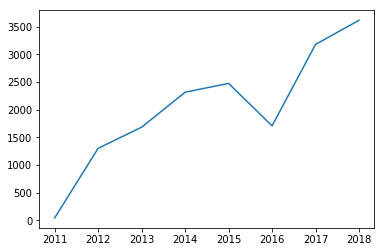

In [215]:
total_count.plot()

In [216]:
single_words_count = pd.DataFrame([wohn, fluchtling, schul, polizei], index = ('wohn', 'fluchtling', 'schul', 'polizei')).T
single_words_count.drop(2019, inplace =True)

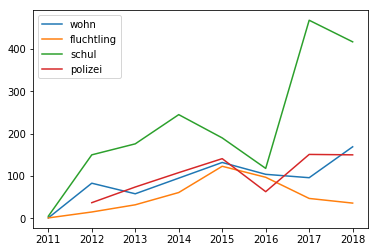

In [217]:
single_words_count.plot()

In [218]:
data = pd.DataFrame(total_count).reset_index()

In [219]:
data.columns = ['date', 'count']
data.to_csv('../data/all_words_ts.csv', index=False)

### Häufigste Worte nach Senatsverwaltung
### *Most frequent words by ministry*

In [220]:
def word_counts_by(column_name, count_vector, count_vocab):
    
    vector_as_df = pd.DataFrame(count_vector.toarray())
    vector_as_df.columns = count_vocab.index
    vector_as_df[column_name] = df[column_name]
    
    # group by the selected column_name and add the overall sum 
    vector_as_df = vector_as_df.groupby(column_name).sum()    
    return vector_as_df

In [221]:
word_count_minist = word_counts_by('ministries', count_vector, count_vocab)

minist = 'Senatsverwaltung für Inneres und Sport'

word_count_minist.loc[minist].sort_values(ascending=False).head(15)

polizei              437
feuerwehr            170
anschlag              93
kriminalitat          84
breitscheidplatz      77
einsatz               72
verfassungsschutz     69
freiwill              58
organisiert           55
polizeieinsatz        53
baderbetrieb          52
straftat              52
kampf                 48
bbb                   43
verwalt               41
Name: Senatsverwaltung für Inneres und Sport, dtype: int64

In [222]:
word_count_minist = word_counts_by('ministries', count_vector, count_vocab)

minist = 'Senatsverwaltung für Umwelt, Verkehr und Klimaschutz'

word_count_minist.loc[minist].sort_values(ascending=False).head(15)

mahlsdorf       41
bahnhof         38
bvg             38
grun            30
sanier          27
bruck           26
iga             25
sbahn           25
sbahnhof        24
tegel           24
rudow           23
barrierefrei    21
monat           21
zustand         20
flughaf         19
Name: Senatsverwaltung für Umwelt, Verkehr und Klimaschutz, dtype: int64

In [223]:
word_count_minist = word_counts_by('ministries', count_vector, count_vocab)

minist = 'Senatsverwaltung für Stadtentwicklung und Umwelt (WP17)'

word_count_minist.loc[minist].sort_values(ascending=False).head(15)

bvg                        62
wohnungsbaugesellschaft    59
wohn                       53
staatsopernskandal         52
sbahn                      51
landeseig                  44
flughaf                    40
tempelhof                  40
ber                        35
sanier                     35
tegel                      31
planung                    30
feld                       29
geplant                    29
barrierefrei               29
Name: Senatsverwaltung für Stadtentwicklung und Umwelt (WP17), dtype: int64

In [224]:
minist1 = 'Senatsverwaltung für Umwelt, Verkehr und Klimaschutz'
minist2 = 'Senatsverwaltung für Stadtentwicklung und Umwelt (WP17)'

word_count_minist.loc[[minist1, minist2]].sum().sort_values(ascending=False).head(10)

bvg                        100
sbahn                       76
sanier                      62
bahnhof                     62
wohnungsbaugesellschaft     59
flughaf                     59
wohn                        58
tegel                       55
staatsopernskandal          52
mahlsdorf                   51
dtype: int64

In [225]:
minist1 = 'Senatsverwaltung für Bildung, Jugend und Familie'
minist2 = 'Senatsverwaltung für Bildung, Jugend und Wissenschaft (WP17)'

word_count_minist.loc[[minist1, minist2]].sum().sort_values(ascending=False).head(10)

schul               606
privat              154
sonderungsverbot    134
schuljahr           125
kind                115
kita                102
grundschul           72
ergebnis             64
jugend               60
minderjahr           48
dtype: int64

### Netzwerk der Worte: welche hängen miteinander zusammen?
### *Network of Words: which words are related?*

In [226]:
df["title_stemmed_list"] = df.title_stemm.apply(lambda x: x.split(" "))
df.to_csv('../data/preprocessed.csv', index_label='index')

In [227]:
df_selection = df #[df.ministries.apply(lambda x: 'Stadtentwicklung' in x)]

In [228]:
pair_list = []
for stemmed_title in df_selection.title_stemmed_list:
    tuples = list(itertools.combinations(stemmed_title, 2))
    for t in tuples:
        pair_list.append(t)
pairs=pd.Series(pair_list).value_counts()
df_pairs = pd.DataFrame(pairs).reset_index()

In [229]:
pairs.head(10)

(privat, sonderungsverbot)              131
(anschlag, breitscheidplatz)             85
(organisiert, kriminalitat)              74
(kind, jugend)                           63
(privat, schul)                          59
(freiwill, feuerwehr)                    59
(landeseig, wohnungsbaugesellschaft)     53
(kampf, rockerkriminalitat)              53
(landeseig, unternehm)                   52
(unbegleitet, minderjahr)                50
dtype: int64

In [230]:
def write_json(filename, threshold_pairs, threshold_nodes):
    pairs_select = pairs[pairs > threshold_pairs]
    nodes_select = count_vocab[count_vocab > threshold_nodes]
    nodes = []
    for i in range(len(nodes_select)):
        nodes.append({'id':i, 'name': nodes_select.index[i].upper(), 'size':int(nodes_select[i])})

    links = []
    for j in range(len(pairs_select)):
        if((pairs_select.index[j][0] in nodes_select.index)& (pairs_select.index[j][1] in nodes_select.index )):
            source = nodes_select.index.get_loc(pairs_select.index[j][0])
            target = nodes_select.index.get_loc(pairs_select.index[j][1])
            links.append({'source': int(source), 'target': int(target), 'weight': int(pairs_select[j])})

    with open(filename, 'w') as f:
        json.dump({'nodes': nodes, 'links': links},
                  f, indent=4,)


In [231]:
# write json files for d3 network graph
write_json('../data/graph.json', 5, 5)
write_json('../data/graph_small.json', 5, 25)

### Einzelne Worte und Themen
### *Inspecting single words and topics*

Was ist der ganze Titel hinter einzelnen Worten? (Ändere "word" in der nächste Zelle nach gewünschtem Wort)
What's the entire title behind single words? (Change word in next cell for other words)

In [232]:
word = 'sonderungsverbot' #other words e.g.: breitscheidplatz, polizei, 

In [233]:
# check titles where word is contained
df[(df.title_stemm.apply(lambda x: word in x))].head()

,id,title_processed,title_stemm,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime,title_stemmed_list
10230,64708,privatschulen elitären clubs sonderungsverbot,privatschul elitar club sonderungsverbot,Privatschulen dürfen keine elitären Clubs sein...,Drucksache 18 / 10 783 \n Schriftliche A...,True,2017-03-30,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-03-30,"[privatschul, elitar, club, sonderungsverbot]"
10338,65439,privatschulen elitären clubs sonderungsverbot ...,privatschul elitar club sonderungsverbot hoh s...,Privatschulen dürfen keine elitären Clubs sein...,Drucksache 18 / 10 782 \n Schriftliche A...,True,2017-04-10,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-04-10,"[privatschul, elitar, club, sonderungsverbot, ..."
10793,67628,privatschulen tacheles lmb schulgeld gebühren ...,privatschul tachel lmb schulgeld gebuhr sonder...,Privatschulen in Berlin: Jetzt mal Tacheles! -...,Drucksache 18 / 11 128 \n Schriftliche A...,True,2017-05-17,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-05-17,"[privatschul, tachel, lmb, schulgeld, gebuhr, ..."
10990,68819,hält private alternative schule 12p11 sonderun...,privat alternativ schul 12p11 sonderungsverbot,Hält sich die private Alternative Schule (12P1...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, alternativ, schul, 12p11, sonderungsv..."
11003,68831,hält private freie schule charlottenburg 04p15...,privat freie schul charlottenburg 04p15 sonder...,Hält sich die private Freie Schule Charlottenb...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, freie, schul, charlottenburg, 04p15, ..."


In [234]:
# check titles where word is contained and has table
df[(df.contains_table == True) &(df.title_stemmed_list.apply(lambda x: word in x))].head(15)

,id,title_processed,title_stemm,title,contents,contains_table,published_at,url,legislative_term,ministries,ministries_short,org,published_datetime,title_stemmed_list
10230,64708,privatschulen elitären clubs sonderungsverbot,privatschul elitar club sonderungsverbot,Privatschulen dürfen keine elitären Clubs sein...,Drucksache 18 / 10 783 \n Schriftliche A...,True,2017-03-30,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-03-30,"[privatschul, elitar, club, sonderungsverbot]"
10338,65439,privatschulen elitären clubs sonderungsverbot ...,privatschul elitar club sonderungsverbot hoh s...,Privatschulen dürfen keine elitären Clubs sein...,Drucksache 18 / 10 782 \n Schriftliche A...,True,2017-04-10,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-04-10,"[privatschul, elitar, club, sonderungsverbot, ..."
10793,67628,privatschulen tacheles lmb schulgeld gebühren ...,privatschul tachel lmb schulgeld gebuhr sonder...,Privatschulen in Berlin: Jetzt mal Tacheles! -...,Drucksache 18 / 11 128 \n Schriftliche A...,True,2017-05-17,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-05-17,"[privatschul, tachel, lmb, schulgeld, gebuhr, ..."
10990,68819,hält private alternative schule 12p11 sonderun...,privat alternativ schul 12p11 sonderungsverbot,Hält sich die private Alternative Schule (12P1...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, alternativ, schul, 12p11, sonderungsv..."
11003,68831,hält private freie schule charlottenburg 04p15...,privat freie schul charlottenburg 04p15 sonder...,Hält sich die private Freie Schule Charlottenb...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, freie, schul, charlottenburg, 04p15, ..."
11004,68832,hält private freie schule elsengrund 10p12 son...,privat freie schul elsengrund 10p12 sonderungs...,Hält sich die private Freie Schule am Elsengru...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, freie, schul, elsengrund, 10p12, sond..."
11005,68833,hält private evangelische schule wilmersdorf 0...,privat evangel schul wilmersdorf 04p21 sonderu...,Hält sich die private Evangelische Schule Wilm...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, evangel, schul, wilmersdorf, 04p21, s..."
11006,68834,hält private evangelische schule lichtenberg 1...,privat evangel schul lichtenberg 11p03 sonderu...,Hält sich die private Evangelische Schule Lich...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, evangel, schul, lichtenberg, 11p03, s..."
11007,68835,hält private evangelische schule charlottenbur...,privat evangel schul charlottenburg 04p05 sond...,Hält sich die private Evangelische Schule Char...,Drucksache 18 / 11 356 - 11 485 \n Schri...,True,2017-06-14,http://pardok.parlament-berlin.de/starweb/adis...,18,"Senatsverwaltung für Bildung, Jugend und Familie","Sen. Bildung, Jugend und Familie",SPD,2017-06-14,"[privat, evangel, schul, charlottenburg, 04p05..."
11